In [1]:
import pandas as pd
from os import path

In [2]:
DATA_DIR = "../../data"

In [3]:
seeds = [2, 13, 19, 27, 38, 42, 56, 63, 6, 78]

In [55]:
split_results = {}
for seed in seeds:
    results = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/10-fold-cross-val", 
        f"training_split_{str(seed)}", 
        "all.csv"
    ), sep="\t", header=None)
    results.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    split_results[seed] = results.drop("filename", axis=1)

In [5]:
split_results[2].groupby("model_name")[["F1", "MCC", "Acc", "Precision", "Recall", "AUC"]].mean()

,F1,MCC,Acc,Precision,Recall,AUC
model_name,,,,,,
SVM,0.371143,0.146661,0.605016,0.296979,0.542168,0.581581
gradient_boosting,0.303315,0.147968,0.702474,0.345715,0.340153,0.569799
kNN,0.315355,0.080399,0.605809,0.260567,0.439464,0.544628
logistic_regression,0.387935,0.174601,0.635576,0.306302,0.543291,0.600654
multilayer_perceptron,0.337268,0.160613,0.668304,0.333908,0.429923,0.580599
random_forest,0.340624,0.139347,0.652799,0.301725,0.443418,0.575020


In [56]:
df_list = [split_results[seed] for seed in seeds]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)
df_concat.index = pd.MultiIndex.from_arrays(
    df_concat[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [7]:
df_concat

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,sapiens,no_prepro,kNN,sapiens,no_prepro,0.222222,0.049237,0.712821,0.200000,0.250000,0.526840
logistic_regression,sapiens,no_prepro,logistic_regression,sapiens,no_prepro,0.155340,-0.105068,0.553846,0.112676,0.250000,0.431748
random_forest,sapiens,no_prepro,random_forest,sapiens,no_prepro,0.000000,-0.071877,0.810256,0.000000,0.000000,0.484663
multilayer_perceptron,sapiens,no_prepro,multilayer_perceptron,sapiens,no_prepro,0.135135,-0.063736,0.671795,0.119048,0.156250,0.464628
SVM,sapiens,no_prepro,SVM,sapiens,no_prepro,0.126126,-0.168216,0.502564,0.088608,0.218750,0.388516
...,...,...,...,...,...,...,...,...,...,...,...
logistic_regression,onehot,undersampling,logistic_regression,onehot,undersampling,0.434343,0.263509,0.668639,0.325758,0.651515,0.662155
random_forest,onehot,undersampling,random_forest,onehot,undersampling,0.427273,0.253701,0.627219,0.305195,0.712121,0.659369
multilayer_perceptron,onehot,undersampling,multilayer_perceptron,onehot,undersampling,0.433498,0.262213,0.659763,0.321168,0.666667,0.662377


In [8]:
grouped = df_concat.groupby(level=[0,1,2])
df_means = grouped.mean()

In [9]:
# Means across the different data splits
df_means

F1       MCC       Acc  Precision  \
model_name    data   preprocessing                                            
SVM           bert   no_prepro      0.507240  0.364032  0.730250   0.402953   
                     oversampling   0.506687  0.367155  0.708219   0.387133   
                     scaling        0.505689  0.364406  0.729699   0.400351   
                     smote_os       0.501018  0.354187  0.709613   0.390839   
                     undersampling  0.488984  0.342339  0.680031   0.361206   
...                                      ...       ...       ...        ...   
random_forest seqvec no_prepro      0.451953  0.290178  0.681680   0.355046   
                     oversampling   0.447549  0.283385  0.667503   0.341227   
                     scaling        0.414400  0.265833  0.738895   0.411235   
                     smote_os       0.447118  0.315350  0.776828   0.445276   
                     undersampling  0.463626  0.303955  0.687084   0.352312   

                                      Recall       AUC  
model_name    data   preprocessing                      
SVM           bert   no_prepro      0.690977  0.714284  
                     oversampling   0.746117  0.722401  
                     scaling        0.694907  0.716397  
                     smote_os       0.713847  0.709784  
                     undersampling  0.763185  0.710218  
...                                      ...       ...  
random_forest seqvec no_prepro      0.656784  0.671579  
                     oversampling   0.677699  0.671945  
                     scaling        0.463628  0.634716  
                     smote_os       0.468485  0.661370  
                     undersampling  0.682999  0.685151  

[210 rows x 6 columns]

# Model Statistics

In [10]:
df_means.groupby("model_name")[["F1", "MCC"]].mean()

,F1,MCC
model_name,,
SVM,0.394295,0.205165
gradient_boosting,0.334377,0.204689
kNN,0.330485,0.128041
logistic_regression,0.422709,0.245924
multilayer_perceptron,0.364970,0.208613
random_forest,0.385203,0.224734


In [52]:
# Best combination for each model type
idx = df_means.groupby(['model_name'])['F1'].transform(max) == df_means['F1']
df_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,seqvec,scaling,0.509131,0.369820,0.728634,0.407589,0.700679,0.718130
gradient_boosting,bert,oversampling,0.475494,0.319293,0.702276,0.371692,0.672134,0.690392
kNN,bert,smote_os,0.408461,0.218477,0.558076,0.278995,0.767088,0.636332
logistic_regression,pybiomed,oversampling,0.536689,0.406583,0.760790,0.437494,0.697789,0.736774
multilayer_perceptron,bert,oversampling,0.531950,0.401169,0.762377,0.438532,0.681812,0.730759
random_forest,bert,undersampling,0.474726,0.319482,0.680608,0.353643,0.724145,0.696209


In [54]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_model.csv"), sep="\t")

# Data Statistics

In [47]:
df_means.groupby("data")[["F1", "MCC"]].mean()

,F1,MCC
data,,
bert,0.456629,0.313078
integer_encoded,0.324629,0.143140
onehot,0.405819,0.249978
protparam,0.323212,0.109874
pybiomed,0.430884,0.291806
sapiens,0.214769,0.008257
seqvec,0.448105,0.303894


In [48]:
# Best combination for each data representation
idx = df_means.groupby(['data'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC  \
model_name            data            preprocessing                       
logistic_regression   integer_encoded oversampling   0.386339  0.193980   
                      onehot          scaling        0.473227  0.321671   
                      pybiomed        oversampling   0.536689  0.406583   
                      seqvec          scaling        0.532628  0.401101   
multilayer_perceptron bert            oversampling   0.531950  0.401169   
                      sapiens         undersampling  0.286875  0.045490   
random_forest         protparam       no_prepro      0.454840  0.320597   

                                                          Acc  Precision  \
model_name            data            preprocessing                        
logistic_regression   integer_encoded oversampling   0.671059   0.307248   
                      onehot          scaling        0.711729   0.378534   
                      pybiomed        oversampling   0.760790   0.437494   
                      seqvec          scaling        0.746881   0.429014   
multilayer_perceptron bert            oversampling   0.762377   0.438532   
                      sapiens         undersampling  0.507907   0.193383   
random_forest         protparam       no_prepro      0.770327   0.447753   

                                                       Recall       AUC  
model_name            data            preprocessing                      
logistic_regression   integer_encoded oversampling   0.523023  0.615672  
                      onehot          scaling        0.653494  0.689867  
                      pybiomed        oversampling   0.697789  0.736774  
                      seqvec          scaling        0.716550  0.734494  
multilayer_perceptron bert            oversampling   0.681812  0.730759  
                      sapiens         undersampling  0.564011  0.529952  
random_forest         protparam       no_prepro      0.487191  0.664357

In [49]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_data.csv"))

# Preprocessing Statistics

In [14]:
df_means.groupby("preprocessing")[["F1", "MCC"]].mean()

,F1,MCC
preprocessing,,
no_prepro,0.348428,0.195080
oversampling,0.393549,0.210792
scaling,0.350416,0.198809
smote_os,0.366140,0.203015
undersampling,0.401500,0.206609


In [15]:
# Best combination for each preprocessing
idx = df_means.groupby(['preprocessing'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed no_prepro      0.534737  0.403607  0.756843   
                               oversampling   0.536689  0.406583  0.760790   
                      seqvec   scaling        0.532628  0.401101  0.746881   
                               smote_os       0.524962  0.392618  0.771227   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed no_prepro       0.432036  0.703476  0.736316  
                               oversampling    0.437494  0.697789  0.736774  
                      seqvec   scaling         0.429014  0.716550  0.734494  
                               smote_os        0.457876  0.629810  0.717434  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955

# Best total results

In [50]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling   0.536689  0.406583  0.760790   
                               no_prepro      0.534737  0.403607  0.756843   
                      seqvec   scaling        0.532628  0.401101  0.746881   
multilayer_perceptron bert     oversampling   0.531950  0.401169  0.762377   
logistic_regression   seqvec   no_prepro      0.531949  0.399743  0.743909   
                      pybiomed scaling        0.529316  0.396199  0.756182   
                      seqvec   smote_os       0.524962  0.392618  0.771227   
                               oversampling   0.522227  0.386392  0.733405   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   
                               smote_os       0.514998  0.379917  0.762960   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling    0.437494  0.697789  0.736774  
                               no_prepro       0.432036  0.703476  0.736316  
                      seqvec   scaling         0.429014  0.716550  0.734494  
multilayer_perceptron bert     oversampling    0.438532  0.681812  0.730759  
logistic_regression   seqvec   no_prepro       0.422766  0.724898  0.736120  
                      pybiomed scaling         0.431315  0.689428  0.730985  
                      seqvec   smote_os        0.457876  0.629810  0.717434  
                               oversampling    0.409140  0.727253  0.730577  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955  
                               smote_os        0.439925  0.634271  0.714059

In [51]:
df_means.nlargest(10, 'F1').to_csv(path.join(DATA_DIR, "evaluations/best_total.csv"))

In [17]:
df_means.nlargest(10, 'MCC')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling   0.536689  0.406583  0.760790   
                               no_prepro      0.534737  0.403607  0.756843   
multilayer_perceptron bert     oversampling   0.531950  0.401169  0.762377   
logistic_regression   seqvec   scaling        0.532628  0.401101  0.746881   
                               no_prepro      0.531949  0.399743  0.743909   
                      pybiomed scaling        0.529316  0.396199  0.756182   
                      seqvec   smote_os       0.524962  0.392618  0.771227   
                               oversampling   0.522227  0.386392  0.733405   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   
                               smote_os       0.514998  0.379917  0.762960   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling    0.437494  0.697789  0.736774  
                               no_prepro       0.432036  0.703476  0.736316  
multilayer_perceptron bert     oversampling    0.438532  0.681812  0.730759  
logistic_regression   seqvec   scaling         0.429014  0.716550  0.734494  
                               no_prepro       0.422766  0.724898  0.736120  
                      pybiomed scaling         0.431315  0.689428  0.730985  
                      seqvec   smote_os        0.457876  0.629810  0.717434  
                               oversampling    0.409140  0.727253  0.730577  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955  
                               smote_os        0.439925  0.634271  0.714059

# Look at maxima and minima across training splits

### Maximum for models

In [18]:
grouped = df_concat.groupby(level=[0,1,2])
df_max = grouped.max().drop(["model_name", "data", "preprocessing"], axis=1)

In [19]:
idx = df_max.groupby(['model_name'])['F1'].transform(max) == df_max['F1']
df_max[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,bert,smote_os,0.661017,0.568411,0.832636,0.565217,0.795918,0.819012
gradient_boosting,pybiomed,oversampling,0.564706,0.411283,0.773050,0.470588,0.730769,0.731865
kNN,bert,smote_os,0.493976,0.352712,0.648536,0.350427,0.884615,0.718367
logistic_regression,bert,smote_os,0.636364,0.534699,0.832636,0.573770,0.779412,0.788722
multilayer_perceptron,pybiomed,oversampling,0.621359,0.518664,0.836820,0.606061,1.000000,0.768636
random_forest,protparam,no_prepro,0.590909,0.504951,0.849372,0.666667,0.653846,0.731096


### Minimum for models

In [20]:
grouped = df_concat.groupby(level=[0,1,2])
df_min = grouped.min().drop(["model_name", "data", "preprocessing"], axis=1)

In [21]:
idx = df_min.groupby(['model_name'])['F1'].transform(max) == df_min['F1']
df_min[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
SVM                   seqvec   scaling        0.450216  0.249013  0.598101   
gradient_boosting     bert     smote_os       0.431373  0.273958  0.686047   
kNN                   seqvec   undersampling  0.355932  0.089738  0.525799   
logistic_regression   seqvec   no_prepro      0.480874  0.313904  0.664557   
                               scaling        0.480874  0.324969  0.674051   
multilayer_perceptron seqvec   oversampling   0.469565  0.327062  0.696203   
random_forest         pybiomed undersampling  0.404908  0.193483  0.565111   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
SVM                   seqvec   scaling         0.322981  0.551020  0.649884  
gradient_boosting     bert     smote_os        0.319588  0.500000  0.651099  
kNN                   seqvec   undersampling   0.247059  0.571429  0.554007  
logistic_regression   seqvec   no_prepro       0.369565  0.666667  0.687456  
                               scaling         0.376068  0.591837  0.693554  
multilayer_perceptron seqvec   oversampling    0.393443  0.478261  0.686164  
random_forest         pybiomed undersampling   0.308219  0.500000  0.616144

### Maximum for data

In [22]:
idx = df_max.groupby(['data'])['F1'].transform(max) == df_max['F1']
df_max[idx]

F1       MCC  \
model_name          data            preprocessing                       
SVM                 bert            smote_os       0.661017  0.568411   
                    onehot          oversampling   0.589147  0.473594   
                    sapiens         scaling        0.390244  0.236061   
gradient_boosting   integer_encoded oversampling   0.504202  0.356373   
logistic_regression pybiomed        no_prepro      0.632768  0.522670   
                    seqvec          oversampling   0.615385  0.506697   
random_forest       protparam       no_prepro      0.590909  0.504951   

                                                        Acc  Precision  \
model_name          data            preprocessing                        
SVM                 bert            smote_os       0.832636   0.565217   
                    onehot          oversampling   0.777311   0.475000   
                    sapiens         scaling        0.687500   0.290909   
gradient_boosting   integer_encoded oversampling   0.769504   0.428571   
logistic_regression pybiomed        no_prepro      0.815900   0.536232   
                    seqvec          oversampling   0.811715   0.529412   
random_forest       protparam       no_prepro      0.849372   0.666667   

                                                     Recall       AUC  
model_name          data            preprocessing                      
SVM                 bert            smote_os       0.795918  0.819012  
                    onehot          oversampling   0.871429  0.776644  
                    sapiens         scaling        0.592593  0.649680  
gradient_boosting   integer_encoded oversampling   0.619565  0.700859  
logistic_regression pybiomed        no_prepro      0.823529  0.793340  
                    seqvec          oversampling   0.804348  0.784249  
random_forest       protparam       no_prepro      0.653846  0.731096

### Minimum for data

In [23]:
idx = df_min.groupby(['data'])['F1'].transform(max) == df_min['F1']
df_min[idx]

F1       MCC  \
model_name            data            preprocessing                       
SVM                   onehot          undersampling  0.398104  0.163803   
logistic_regression   pybiomed        oversampling   0.466258  0.291300   
                      seqvec          no_prepro      0.480874  0.313904   
                                      scaling        0.480874  0.324969   
multilayer_perceptron bert            oversampling   0.467066  0.314971   
                      sapiens         undersampling  0.206897 -0.072888   
random_forest         integer_encoded undersampling  0.341232  0.073060   
                      protparam       undersampling  0.402010  0.177123   

                                                          Acc  Precision  \
model_name            data            preprocessing                        
SVM                   onehot          undersampling  0.536946   0.283582   
logistic_regression   pybiomed        oversampling   0.708861   0.389610   
                      seqvec          no_prepro      0.664557   0.369565   
                                      scaling        0.674051   0.376068   
multilayer_perceptron bert            oversampling   0.690418   0.386139   
                      sapiens         undersampling  0.442424   0.133333   
random_forest         integer_encoded undersampling  0.533170   0.253086   
                      protparam       undersampling  0.615120   0.300885   

                                                       Recall       AUC  
model_name            data            preprocessing                      
SVM                   onehot          undersampling  0.600000  0.597959  
logistic_regression   pybiomed        oversampling   0.575758  0.664808  
                      seqvec          no_prepro      0.666667  0.687456  
                                      scaling        0.591837  0.693554  
multilayer_perceptron bert            oversampling   0.574468  0.681901  
                      sapiens         undersampling  0.454545  0.450194  
random_forest         integer_encoded undersampling  0.514286  0.543728  
                      protparam       undersampling  0.571429  0.604820

# Evaluation on TAP

In [4]:
split_results = {}
for seed in seeds:
    results = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/10-fold-cross-val", 
        f"training_split_{str(seed)}", 
        "tap.csv"
    ), sep="\t", header=None)
    results.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    split_results[seed] = results.drop("filename", axis=1)

In [5]:
df_list = [split_results[seed] for seed in seeds]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)
df_concat["preprocessing"] = df_concat["preprocessing"].apply(lambda s: s[1:])
df_concat.index = pd.MultiIndex.from_arrays(
    df_concat[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [6]:
df_concat

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,integer_encoded,no_prepro,kNN,integer_encoded,no_prepro,0.394464,0.068463,0.273859,0.982759,0.246753,0.573377
logistic_regression,integer_encoded,no_prepro,logistic_regression,integer_encoded,no_prepro,0.683333,-0.027003,0.526971,0.953488,0.532468,0.466234
random_forest,integer_encoded,no_prepro,random_forest,integer_encoded,no_prepro,0.653409,-0.040750,0.493776,0.950413,0.497835,0.448918
multilayer_perceptron,integer_encoded,no_prepro,multilayer_perceptron,integer_encoded,no_prepro,0.448845,-0.046023,0.307054,0.944444,0.294372,0.447186
SVM,integer_encoded,no_prepro,SVM,integer_encoded,no_prepro,0.433333,-0.052331,0.294606,0.942029,0.281385,0.440693
...,...,...,...,...,...,...,...,...,...,...,...
logistic_regression,onehot,undersampling,logistic_regression,onehot,undersampling,0.732620,-0.002812,0.585062,0.958042,0.593074,0.496537
random_forest,onehot,undersampling,random_forest,onehot,undersampling,0.729223,-0.004563,0.580913,0.957746,0.588745,0.494372
multilayer_perceptron,onehot,undersampling,multilayer_perceptron,onehot,undersampling,0.734584,0.037729,0.589212,0.964789,0.593074,0.546537


In [11]:
tap_grouped = df_concat.groupby(level=[0,1,2])
tap_means = tap_grouped.mean()

In [12]:
tap_means

F1       MCC       Acc  Precision  \
model_name    data   preprocessing                                            
SVM           bert   no_prepro      0.661254  0.025954  0.507054   0.963520   
                     oversampling   0.711223  0.046175  0.563485   0.966418   
                     scaling        0.667893  0.029100  0.514523   0.964228   
                     smote_os       0.694249  0.030376  0.543983   0.963732   
                     undersampling  0.721046  0.015814  0.573859   0.961061   
...                                      ...       ...       ...        ...   
random_forest seqvec no_prepro      0.000000  0.000000  0.041494   0.000000   
                     oversampling   0.000000  0.000000  0.041494   0.000000   
                     scaling        0.000000  0.000000  0.041494   0.000000   
                     smote_os       0.203799 -0.014322  0.195851   0.373110   
                     undersampling  0.367722 -0.005886  0.314108   0.674183   

                                      Recall       AUC  
model_name    data   preprocessing                      
SVM           bert   no_prepro      0.504762  0.532381  
                     oversampling   0.564069  0.557035  
                     scaling        0.512554  0.536277  
                     smote_os       0.544589  0.537294  
                     undersampling  0.578788  0.519394  
...                                      ...       ...  
random_forest seqvec no_prepro      0.000000  0.500000  
                     oversampling   0.000000  0.500000  
                     scaling        0.000000  0.500000  
                     smote_os       0.168831  0.494416  
                     undersampling  0.297835  0.493918  

[210 rows x 6 columns]

In [13]:
tap_means.groupby("model_name")[["F1", "Acc"]].mean()

,F1,Acc
model_name,,
SVM,0.566126,0.447386
gradient_boosting,0.439618,0.336230
kNN,0.501256,0.381897
logistic_regression,0.558312,0.433788
multilayer_perceptron,0.448454,0.345216
random_forest,0.509247,0.392033


In [15]:
idx = tap_means.groupby(['model_name'])['Acc'].transform(max) == tap_means['Acc']
tap_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,onehot,_undersampling,0.794903,0.006174,0.670124,0.959535,0.684848,0.507424
gradient_boosting,onehot,_undersampling,0.764881,-0.033862,0.624066,0.953513,0.638961,0.459481
kNN,bert,_smote_os,0.803050,-0.088644,0.672614,0.947037,0.697403,0.398701
logistic_regression,onehot,_undersampling,0.767492,0.007967,0.629461,0.959937,0.640260,0.510130
multilayer_perceptron,protparam,_smote_os,0.685958,0.007428,0.598340,0.965105,0.606494,0.508247
random_forest,onehot,_undersampling,0.775006,-0.023878,0.638174,0.955078,0.653247,0.471623


In [16]:
idx = df_means.groupby(['model_name'])['Acc'].transform(max) == df_means['Acc']
df_means[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
SVM                   onehot   smote_os       0.370342  0.261385  0.779592   
gradient_boosting     bert     scaling        0.335300  0.266914  0.805544   
kNN                   bert     no_prepro      0.321535  0.164065  0.741989   
                               scaling        0.321535  0.164065  0.741989   
logistic_regression   seqvec   smote_os       0.524962  0.392618  0.771227   
multilayer_perceptron bert     no_prepro      0.466924  0.362935  0.807379   
                               scaling        0.466924  0.362935  0.807379   
random_forest         pybiomed smote_os       0.375341  0.275552  0.798391   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
SVM                   onehot   smote_os        0.460001  0.344501  0.616744  
gradient_boosting     bert     scaling         0.535827  0.253728  0.598209  
kNN                   bert     no_prepro       0.336278  0.312139  0.580162  
                               scaling         0.336278  0.312139  0.580162  
logistic_regression   seqvec   smote_os        0.457876  0.629810  0.717434  
multilayer_perceptron bert     no_prepro       0.535892  0.434399  0.667613  
                               scaling         0.535892  0.434399  0.667613  
random_forest         pybiomed smote_os        0.493666  0.306923  0.613783

In [16]:
tap_means.groupby("data")[["F1", "Acc"]].mean()

,F1,Acc
data,,
bert,0.626612,0.481660
integer_encoded,0.576332,0.434606
onehot,0.616718,0.472822
protparam,0.587069,0.453029
pybiomed,0.566900,0.424371
sapiens,0.464429,0.344606
seqvec,0.088789,0.114882


In [17]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling   0.536689  0.406583  0.760790   
                               no_prepro      0.534737  0.403607  0.756843   
                      seqvec   scaling        0.532628  0.401101  0.746881   
multilayer_perceptron bert     oversampling   0.531950  0.401169  0.762377   
logistic_regression   seqvec   no_prepro      0.531949  0.399743  0.743909   
                      pybiomed scaling        0.529316  0.396199  0.756182   
                      seqvec   smote_os       0.524962  0.392618  0.771227   
                               oversampling   0.522227  0.386392  0.733405   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   
                               smote_os       0.514998  0.379917  0.762960   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling    0.437494  0.697789  0.736774  
                               no_prepro       0.432036  0.703476  0.736316  
                      seqvec   scaling         0.429014  0.716550  0.734494  
multilayer_perceptron bert     oversampling    0.438532  0.681812  0.730759  
logistic_regression   seqvec   no_prepro       0.422766  0.724898  0.736120  
                      pybiomed scaling         0.431315  0.689428  0.730985  
                      seqvec   smote_os        0.457876  0.629810  0.717434  
                               oversampling    0.409140  0.727253  0.730577  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955  
                               smote_os        0.439925  0.634271  0.714059

In [15]:
tap_means.nlargest(10, 'Acc')

F1       MCC       Acc  \
model_name          data      preprocessing                                 
kNN                 bert      smote_os       0.803050 -0.088644  0.672614   
SVM                 onehot    undersampling  0.794903  0.006174  0.670124   
                    protparam no_prepro      0.781121 -0.005284  0.653527   
random_forest       onehot    undersampling  0.775006 -0.023878  0.638174   
logistic_regression onehot    undersampling  0.767492  0.007967  0.629461   
kNN                 bert      undersampling  0.766000 -0.057181  0.625726   
SVM                 protparam smote_os       0.755468 -0.009070  0.624896   
gradient_boosting   onehot    undersampling  0.764881 -0.033862  0.624066   
kNN                 onehot    undersampling  0.763363 -0.042029  0.623651   
gradient_boosting   onehot    oversampling   0.751269 -0.060326  0.609129   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
kNN                 bert      smote_os        0.947037  0.697403  0.398701  
SVM                 onehot    undersampling   0.959535  0.684848  0.507424  
                    protparam no_prepro       0.957831  0.667965  0.493983  
random_forest       onehot    undersampling   0.955078  0.653247  0.471623  
logistic_regression onehot    undersampling   0.959937  0.640260  0.510130  
kNN                 bert      undersampling   0.949904  0.643290  0.431645  
SVM                 protparam smote_os        0.958846  0.636797  0.493398  
gradient_boosting   onehot    undersampling   0.953513  0.638961  0.459481  
kNN                 onehot    undersampling   0.952033  0.639394  0.449697  
gradient_boosting   onehot    oversampling    0.949225  0.625541  0.427771

In [19]:
# How did the best models from TAP do on test?

In [42]:
idx = tap_means.nlargest(10, 'Acc')["Acc"].index
tap_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
kNN                 bert      smote_os       0.803050 -0.088644  0.672614   
SVM                 onehot    undersampling  0.794903  0.006174  0.670124   
                    protparam no_prepro      0.781121 -0.005284  0.653527   
random_forest       onehot    undersampling  0.775006 -0.023878  0.638174   
logistic_regression onehot    undersampling  0.767492  0.007967  0.629461   
kNN                 bert      undersampling  0.766000 -0.057181  0.625726   
SVM                 protparam smote_os       0.755468 -0.009070  0.624896   
gradient_boosting   onehot    undersampling  0.764881 -0.033862  0.624066   
kNN                 onehot    undersampling  0.763363 -0.042029  0.623651   
gradient_boosting   onehot    oversampling   0.751269 -0.060326  0.609129   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
kNN                 bert      smote_os        0.947037  0.697403  0.398701  
SVM                 onehot    undersampling   0.959535  0.684848  0.507424  
                    protparam no_prepro       0.957831  0.667965  0.493983  
random_forest       onehot    undersampling   0.955078  0.653247  0.471623  
logistic_regression onehot    undersampling   0.959937  0.640260  0.510130  
kNN                 bert      undersampling   0.949904  0.643290  0.431645  
SVM                 protparam smote_os        0.958846  0.636797  0.493398  
gradient_boosting   onehot    undersampling   0.953513  0.638961  0.459481  
kNN                 onehot    undersampling   0.952033  0.639394  0.449697  
gradient_boosting   onehot    oversampling    0.949225  0.625541  0.427771

In [43]:
df_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
kNN                 bert      smote_os       0.408461  0.218477  0.558076   
SVM                 onehot    undersampling  0.439065  0.270890  0.614257   
                    protparam no_prepro      0.290875 -0.023772  0.402909   
random_forest       onehot    undersampling  0.434021  0.257888  0.621630   
logistic_regression onehot    undersampling  0.454904  0.289730  0.645970   
kNN                 bert      undersampling  0.407331  0.214259  0.598942   
SVM                 protparam smote_os       0.301726  0.014529  0.434281   
gradient_boosting   onehot    undersampling  0.440928  0.267488  0.624575   
kNN                 onehot    undersampling  0.400957  0.204203  0.574131   
gradient_boosting   onehot    oversampling   0.435464  0.262774  0.668426   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
kNN                 bert      smote_os        0.278995  0.767088  0.636332  
SVM                 onehot    undersampling   0.310213  0.759729  0.668113  
                    protparam no_prepro       0.190262  0.627450  0.484687  
random_forest       onehot    undersampling   0.310278  0.726287  0.659607  
logistic_regression onehot    undersampling   0.329241  0.738191  0.679574  
kNN                 bert      undersampling   0.289271  0.692561  0.633792  
SVM                 protparam smote_os        0.203446  0.624878  0.507576  
gradient_boosting   onehot    undersampling   0.315373  0.737807  0.666320  
kNN                 onehot    undersampling   0.279910  0.715698  0.627274  
gradient_boosting   onehot    oversampling    0.331857  0.645819  0.659064

# Error bars

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
f1_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1"]]

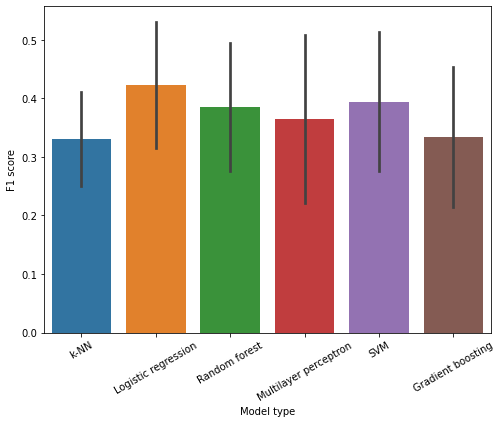

In [113]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="model_name", y="F1", data=f1_df, ci="sd")
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

In [60]:
grouped = df_concat.groupby(level=[0,1,2])
grouped

In [85]:
means = grouped.mean()[["F1"]]
means.rename({"F1": "mean"}, axis=1, inplace=True)
se = grouped.std()[["F1"]]
se.rename({"F1": "sd"}, axis=1, inplace=True)

In [86]:
pd.concat([means, se], axis=1)

mean        sd
model_name    data   preprocessing                    
SVM           bert   no_prepro      0.507240  0.054367
                     oversampling   0.506687  0.062805
                     scaling        0.505689  0.065583
                     smote_os       0.501018  0.072398
                     undersampling  0.488984  0.047544
...                                      ...       ...
random_forest seqvec no_prepro      0.451953  0.065148
                     oversampling   0.447549  0.053766
                     scaling        0.414400  0.067502
                     smote_os       0.447118  0.071582
                     undersampling  0.463626  0.032578

[210 rows x 2 columns]

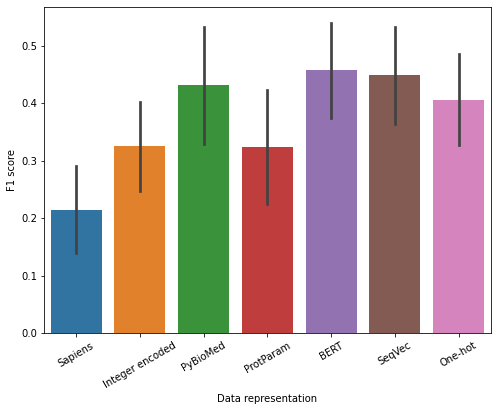

In [128]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="data", y="F1", data=f1_df, ci="sd")
labels = ["Sapiens", "Integer encoded", "PyBioMed", "ProtParam", "BERT", "SeqVec", "One-hot"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

# TAP

In [8]:
tap_acc_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1", "Acc"]]

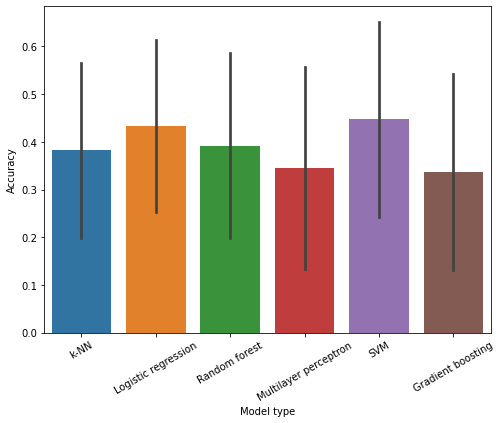

In [9]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="model_name", y="Acc", data=tap_acc_df, ci="sd")
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

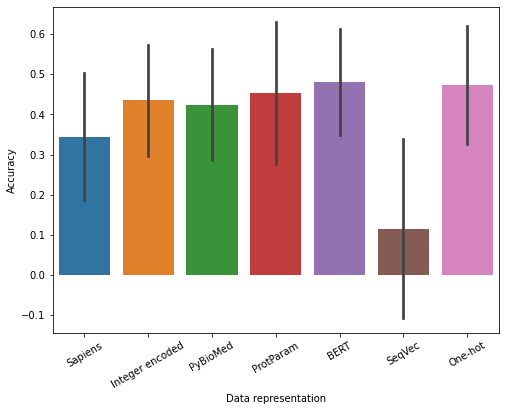

In [18]:
plt.figure(figsize=(8,6))
order = ["sapiens", "integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "onehot"]
ax = sns.barplot(x="data", y="Acc", data=tap_acc_df, ci="sd", order=order)
labels = ["Sapiens", "Integer encoded", "PyBioMed", "ProtParam", "BERT", "SeqVec", "One-hot"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

## ProteinBERT

In [122]:
df_bert = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.526, 0.636, 0.486, 0.324, 0.492, 0.657, 0.482, 0.535, 0.487, 0.417], # F1
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [1,1,1,1,1,1,1,1,1,1]
})

In [124]:
df_acc = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.580, 0.589, 0.598, 0.560, 0.610, 0.535,0.676, 0.560, 0.515, 0.639], # Accuracy
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [0,0,0,0,0,0,0,0,0,0]
})
df_bert_adj = pd.concat([df_bert, df_acc])

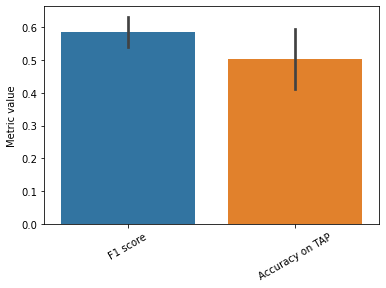

In [130]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="x", y="metric", data=df_bert_adj, ci="sd")
labels = ["F1 score", "Accuracy on TAP"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("")
ax.set_ylabel("Metric value")
plt.savefig(path.join(DATA_DIR, "images/f1_and_acc_protein_bert.png"), bbox_inches='tight')
plt.show()